# Management Summary

# 1. Einleitung

Die Kundenzufriedenheit spielt eine zentrale Rolle in der wettbewerbsintensiven Luftfahrtbranche. Fluggäste erwarten nicht nur eine sichere und pünktliche Beförderung, sondern auch einen exzellenten Service, der ihr Reiseerlebnis positiv beeinflusst. Gerade auf Flugreisen ist die Kundschaft besonders sensibel für die Qualität des angebotenen Services, sei es aufgrund der hohen Ticketpreise oder der unterbewussten Anspannung während des Flugs. Kleine Details im Service können sich summieren und erheblichen Einfluss auf die Wahrnehmung und Zufriedenheit der Passagiere haben. (International, 2014).

Um das Kundenerlebnis systematisch zu optimieren, setzt American Airlines auf Bernard Marrs fünfstufigen Ansatz zur datengetriebenen Entscheidungsfindung. Dieser methodische Ansatz ermöglicht es, fundierte Entscheidungen zu treffen und gezielte Massnahmen zur Verbesserung der Kundenzufriedenheit zu ergreifen. Die vorliegende Arbeit untersucht diesen Prozess detailliert und konzentriert sich dabei auf die ersten vier der fünf Schritte von Marrs (2020):

1.  Ziel und Informationsbedarf definieren (Kapitel 2): Hier werden die Hauptziele festgelegt, die als Grundlage für die weiteren Analysen dienen.
2.  Daten sammeln (Kapitel 3): Dieser Abschnitt behandelt die verschiedenen Aspekte der Datenerhebung, darunter Datenquellen, Datenqualität, Datenbereinigung und Datenmodellierung.
3.  Daten analysieren (Kapitel 4): Die gesammelten und aufbereiteten Daten werden analysiert, um fundierte Erkenntnisse zu gewinnen.
4.  Informationen präsentieren (Kapitel 6): Die Analyseergebnisse werden strukturiert aufbereitet und visualisiert, um eine fundierte Entscheidungsgrundlage zu schaffen.

Der fünfte Schritt, datengestützte Entscheidungen treffen, wird in dieser Arbeit nicht umgesetzt, da er nicht Teil der Aufgabenstellung ist.


# 2. Ziel und Informationsbedarf definieren

American Airlines verfolgt das Ziel, die Kundenzufriedenheit kontinuierlich zu verbessern, um sich im hart umkämpften Luftverkehrsmarkt erfolgreich zu behaupten. Dazu ist es notwendig, die wesentlichen Einflussfaktoren zu identifizieren, die das Reiseerlebnis der Passagiere positiv oder negativ beeinflussen. Ein datenbasierter Ansatz ermöglicht es, fundierte Entscheidungen zur Optimierung des Services und der betrieblichen Abläufe zu treffen.

Im Rahmen dieser Projektarbeit sollen daher folgende zentrale Fragen untersucht werden:

1.  Welche Faktoren haben den grössten Einfluss auf die Kundenzufriedenheit bei der American Airline im Luftverkehr?
2.  Welche Faktoren beeinflussen Flugverspätungen bei der American Airline am meisten?
3.  Wie variieren Passagieraufkommen und Flugverkehr bei der American Airlines über Zeit und Regionen hinweg, und welche Auswirkungen hat dies auf die Kundenzufriedenheit?

# 3. Daten sammeln
Eine systematische und strukturierte Datensammlung ist der Grundstein für die spätere Analyse und Entscheidungsfindung. Im folgenden Kapitel werden die verschiedenen Aspekte des Datenbeschaffungsprozesses behandelt.

## 3.1 Datenquellen
Die Fluggesellschaft möchte die Faktoren verstehen, die die Kundenzufriedenheit beeinflussen, und Strategien identifizieren, um das Kundenerlebnis zu verbessern. Leider gibt American Airlines keine konkreten Zahlen zu Kundenumfragen oder anderen relevanten Statistiken heraus. Aus diesem Grund bedient sich die Projektgruppe öffentlich zugänglicher, anonymisierter Daten von Kaggle, einer Plattform, die über 50.000 Datensätze zu verschiedensten Themen bietet (Kaggle, o. J.). Die Projektgruppe nutzt diese anonymisierten Datensätze gezielt und wendet sie auf American Airlines an, um daraus relevante Erkenntnisse abzuleiten.

Die Projektgruppe arbeitet mit den folgenden Datenquellen:

- Kundenzufriedenheitsumfrage XX (Annahme, dass diese Umfrage von American Airlines durchgeführt wurde) QUELLE
- Flugverspätungen: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay/code
- Grösste Flughäfen nach Passagieraufkommen zwischen 2016 und 2020: https://www.kaggle.com/datasets/khaiid/most-crowded-airports
- XX (weitere relevante Datensätze, die später spezifiziert werden) QUELLE

## 3.2 Datenqualität und -bereinigung

**Kundenzufriedenheitsumfrage**

Um datenbasierte Erkenntnisse über die Zufriedenheit der Passagiere zu gewinnen wurde der Datensatz "Invistico_Airline" geladen. Ein Ziel der Analyse ist es, die wichtigsten Einflussfaktoren auf die Kundenzufriedenheit zu identifizieren, und daraus konkrete Optimierungsmaßnahmen für die Airline abzuleiten. Der genannte Datensatz enthält dabei über 100000 Kundenbewertungen mit Informationen zur:  
- Demografie (Alter, Geschlecht, Kundentyp)
- Reiseeigenschaften (Flugdistanz, Buchungsklasse, Reisezweck)
- Servicebewertung (z. B. WLAN, Sitzkomfort, Online-Buchung, Essen & Trinken)
- Pünktlichkeit (Verspätungen bei Abflug und Ankunft)
- Zufriedenheit (binäre Zielvariable: zufrieden vs. unzufrieden)



In [ ]:
# Datensatz "Invistico_Airline" von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Invistico_Airline.csv"

# Die letzte Version des Datensatzes laden
df_zufriedenheit = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path,
)

<ipython-input-61-0c2a28e91605>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.64M/1.64M [00:00<00:00, 74.8MB/s]

Extracting zip of Invistico_Airline.csv...


Bevor mit der eigentlichen Analyse begonnen werden konnte, wurden die Daten sorgfältig bereinigt und vorbereitet. Dies geschah damit die Ergebnisse möglichst zuverlässige und aussagekräftige sind. So wurden zuerst geprüft ob mögliche Fehlende Werte im Datensatz vorhanden waren, damit diese entfernt werden können.

In [ ]:
# Fehlende Werte analysieren
print(df_zufriedenheit.isnull().sum())

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


Da es 393 leere Werte in der Spalte "Arrival Delay in Minutes" gab wurden diese Zeilen gedropt.

In [ ]:
df = df_zufriedenheit.dropna()

Im nächsten Schritt wurden verschiedene Spalten umkodiert. So wurde die Zielvariable "Satisfaction" in binäre Werte umgewandelt. Der Wert "satisfied" wurde zur "1" umgewandelt und der Wert "dissatisfied" wurde zur "0".

In [ ]:
# Umwandlung der Zielvariable ("Satisfaction") in binäre Werte
df_zufriedenheit["satisfaction"] = df_zufriedenheit["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

Im nächsten Schritt fand das Umwandeln (Encodieren) von kategorischen Variablen in numerische statt. Dies geschah, damit sie gut für die Analyse verwendet werden können.

In [ ]:
# Kategorische Variablen in numerische Werte umwandeln
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df_zufriedenheit = pd.get_dummies(df_zufriedenheit, columns=categorical_cols, drop_first=True)

**Flugverspätungen**

Für eine zielgerichtete Analyse der Flugverspätungen wurde zunächst der Datensatz "Airlines Delay" von Kaggle geladen. Die Daten enthalten Informationen zu verschiedenen Fluggesellschaften und deren Verbindungen. Zur Fokussierung auf eine homogene Datenbasis wurden ausschliesslich Flüge der Fluggesellschaft American Airlines (AA) berücksichtigt. Alle anderen Einträge wurden aus dem Datensatz entfernt, um Verzerrungen durch unterschiedliche Betriebsmodelle der Airlines zu vermeiden.

In [ ]:
# Datensatz "Airlines Delay" von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "airlines_delay.csv"

# Die letzte Version des Datensatzes laden
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path,
)

<ipython-input-66-8ac0561ef523>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_airlines_delay = kagglehub.load_dataset(


100%|██████████| 5.85M/5.85M [00:00<00:00, 82.6MB/s]

Extracting zip of airlines_delay.csv...


In [ ]:
# Lösche alle Zeilen, die nicht AA in Airline haben

df_airlines_delay = df_airlines_delay[df_airlines_delay['Airline'] == 'AA']
df_airlines_delay['Airline'].unique()

array(['AA'], dtype=object)

Im nächsten Schritt wurde die Qualität der Daten überprüft. Dabei zeigte sich, dass keine fehlenden Werte vorhanden waren, was auf eine hohe Vollständigkeit der Daten hinweist. Um Redundanzen zu vermeiden, wurden zusätzlich doppelte Einträge identifiziert und gelöscht - ingesamt 26760 Einträge.

In [ ]:
# Fehlende Werte analysieren
print(df_airlines_delay.isnull().sum())

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64


In [ ]:
# Suche nach doppelten Zeilen und lösche diese
print(df_airlines_delay.duplicated().sum())
df_airlines_delay.drop_duplicates(inplace=True)

26760


Ein Blick auf die Datentypen der einzelnen Spalten stellte sicher, dass alle Informationen korrekt formatiert waren, etwa Zahlenwerte als numerische Typen und Flughafencodes als Zeichenketten.

In [ ]:
# Zeige die Datentypen aller Spalten an
print(df_airlines_delay.dtypes)

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object


Zur Ergänzung der Daten wurde ein zweiter Datensatz mit den passagierstärksten Flughäfen weltweit (Zeitraum 2016–2020) integriert. Dieser enthielt unter anderem die IATA-Codes sowie die Anzahl der Passagiere pro Flughafen und Jahr. Über eine Extraktion der IATA-Codes aus dem kombinierten Spaltenfeld `Code`
konnten diese mit den Abflug- und Ankunftsorten (`AirportFrom`, `AirportTo`) der American-Airlines-Flüge verknüpft werden.

In [ ]:
# Datensatz "Most Crowded Airports" von Kaggle herunterladen
#!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Airports.csv"

# Die letzte Version laden
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path,
)

<ipython-input-73-eb66bcea8527>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_crowded_airports = kagglehub.load_dataset(


In [ ]:
# Extraktion der IATA- und ICAO-Codes
df_crowded_airports[['IATA', 'ICAO']] = df_crowded_airports['Code'].str.split('/', n=1, expand=True)

Im Zuge der Verknüpfung wurden zwei neue Spalten ergänzt:

*   `AirportFromCrowd`: Passagieraufkommen am Abflughafen
*   `AirportToCrowd`: Passagieraufkommen am Ankunftsflughafen

So lässt sich künftig analysieren, ob ein Zusammenhang zwischen dem Verkehrsaufkommen eines Flughafens und der Wahrscheinlichkeit für Verspätungen besteht.

In [ ]:
# Merge "Passenger" für "AirportFrom"
merged_df_from = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportFrom', right_on='IATA', how='left')
df_airlines_delay['AirportFromCrowd'] = merged_df_from['Passengers']

# Merge "Passenger" für "AirportTo"
merged_df_to = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportTo', right_on='IATA', how='left')
df_airlines_delay['AirportToCrowd'] = merged_df_to['Passengers']

print("First 5 records:", df_airlines_delay.head())

First 5 records:     Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class  \
7   1300.0  1210.0    80.0      AA         DFW       MEM          3      0   
89   550.0  1030.0   150.0      AA         LAS       DFW          7      0   
92  1827.0  1030.0   225.0      AA         DFW       SMF          1      0   
94   655.0   540.0   250.0      AA         JFK       STT          6      0   
99  1822.0   875.0   130.0      AA         DFW       DAY          7      0   

    AirportFromCrowd  AirportToCrowd  
7         48566803.0             NaN  
89        61623756.0             NaN  
92               NaN      69112607.0  
94               NaN      65670697.0  
99        53099282.0      58813103.0  


Abschliessend wurde noch überprüft, wie viele unterschiedliche Werte in den Spalten vorhanden sind. Dabei wurde sichtbar, dass nicht für alle Flughäfen Informationen zum Passagieraufkommen vorliegen. Diese Lücken können auf Flughäfen zurückzuführen sein, die nicht zu den grössten weltweit zählen oder im Zeitraum der Erhebung nicht erfasst wurden. Ein möglicher Umgang damit wäre entweder die Imputation fehlender Werte, das Einholen zusätzlicher Daten oder die gezielte Einschränkung der Analyse auf vollständig verknüpfte Datensätze.

In [ ]:
# Berechne die Anzahl der eindeutigen Werte pro Spalte
unique_counts = df_airlines_delay.nunique()
print(unique_counts)

#ACHTUNG HIER FEHLEN VIELE FLUGHAFEN - wie sollen wir das machen?

Flight              1281
Time                 229
Length                98
Airline                1
AirportFrom           78
AirportTo             78
DayOfWeek              7
Class                  2
AirportFromCrowd      75
AirportToCrowd        76
dtype: int64


**Passagierstatistik im Luftverkehr**

Für eine umfassende Analyse der Passagierstatistiken im Luftverkehr wurde der Datensatz "Air Traffic Passenger Statistics" geladen. Dieser Datensatz enthält detaillierte Informationen zu Flugaktivitäten, Airlines, geografischen Regionen sowie Passagierzahlen, die über verschiedene Zeiträume hinweg erfasst wurden. Die enthaltenen Daten bieten eine Grundlage für Analysen zur Bewertung von Passagierströmen, Markttrends und operativen Kennzahlen innerhalb des Luftverkehrssektors.

Zunächst werden die Daten aus Kaggle importiert, um mit der Datenexploration zu beginnen.

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Air_Traffic_Passenger_Statistics.csv"

# Load the latest version
df_air_traffic = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/airlines-traffic-passenger-statistics",
  file_path,
)

#print("First 5 records:", df.head())
df_air_traffic.head()

<ipython-input-77-bb2b9fd1f662>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_air_traffic = kagglehub.load_dataset(


,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Im Zuge der Bereinigung wird nun ermittelt, welche Daten im Datensatz fehlen. Dazu verwenden wir die Summe aus der ISNA Funktion, welche die Summe der leeren bzw. sogenannten NaN Werte je spalte ausgibt.

In [ ]:
df_air_traffic.isna().sum()

,0
index,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,54
Published Airline,0
Published Airline IATA Code,54
GEO Summary,0
GEO Region,0
Activity Type Code,0
Price Category Code,0


Da die Werte auf beiden Spalten gleich sind, ist anzunehmen dass es sich dieselben Zeilen handelt. Um aber gang sicher zu gehen, lassen wir uns diese Zeilen ausgeben und vergleichen betrachten diese Werte in einem separatem Subset.

In [ ]:
df_air_traffic_leer = df_air_traffic[df_air_traffic.isnull().any(axis=1)]
df_air_traffic_leer

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


Die Datenbereinigung des Hauptdatensatzes wird entsprechend durchgeführt und die leeren Einträge gelöscht. Andere fehlerhafte Daten konnten nicht gefunden werden.

In [ ]:
df_air_traffic_bereinigt = df_air_traffic.dropna()
df_air_traffic_bereinigt.isna().sum()

#Ausgabe der Daten für American Airlines
df_AA = df_air_traffic_bereinigt[df_air_traffic_bereinigt['Published Airline'] == 'American Airlines']
df_AA.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
23,23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577,Deplaned,166577,2005,July
24,24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890,Enplaned,160890,2005,July
25,25,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,5493,Deplaned,5493,2005,July
26,26,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,5213,Enplaned,5213,2005,July
138,138,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,162064,Deplaned,162064,2005,August


## 3.4 Datenmodellierung

# 4 Daten analysieren
Im Zentrum der Datenanalyse stehen "Descriptive", "Diagnostic" und "Predictive Analytics" im Vordergrund.
Die beschreibende Analyse bezieht sich hauptsächlich die Analyse historischer Daten, um vergangene Ereignisse zu verstehen. Ziel ist es Muster und Trends in den Daten zu identifizieren. Übliche Methoden sind Mittelwerte, Standardabweichungen, minimale und maximale Werte, Korrelationen und Kreuztabellen. Für die Visualisierung werden Dashboards und Diagramme oder sogenannte Heatmaps erstellt. Mit "Diagnostic Analytics" wird einen Schritt weiter gegangen und versucht die Ursachen für bestimmte Ereignisse oder Trends zu identifizieren. Hierbei werden zusätzliche Techniken wie sogenannte "Drill-Down-Analysen", Korrelationen und Hypothesentests durchgeführt.
"Predictive Analytics" nutzt historische Daten und statistische Modelle, um zukünftige Ereignisse vorherzusagen. Dabei werden Instrumente wie maschinelles Lernen, Regressionsmodelle und Zeitreihenanalysen durchgeführt (Rashedi, 2024).

## 4.1 Analysen und Erkenntnisse




**Frage: Wie verteilt sich die Passagierzahl auf verschiedene Altersgruppen?**

Zur besseren Einordnung der Passagierstruktur wurde die Altersverteilung analysiert. Dafür wurden die Altersangaben der Befragten in drei Gruppen eingeteilt: „Jünger (≤30)“, „Mittel (31–60)“ und „Älter (>60)“.
Die Analyse zeigt, dass die Mehrheit der Passagiere in die mittlere Altersgruppe (31–60 Jahre) fällt. Diese Gruppe macht 78716 der befragten Personen aus. 40754 der Passagiere sind 30 Jahre oder jünger, während etwa 10017 über 60 Jahre alt sind.

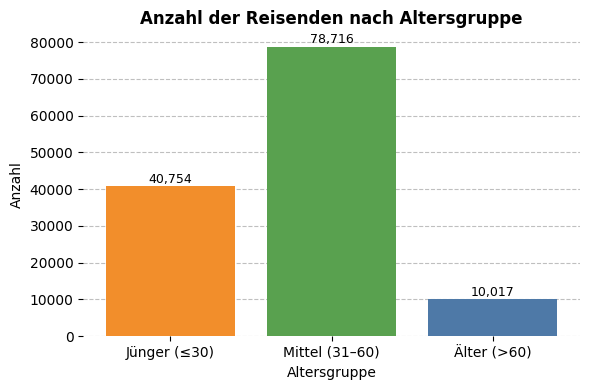

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht geschehen)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Altersgruppen definieren
def alter_gruppe(alter):
    if alter <= 30:
        return 'Jünger (≤30)'
    elif 31 <= alter <= 60:
        return 'Mittel (31–60)'
    else:
        return 'Älter (>60)'

df_zufriedenheit['Altersgruppe'] = df_zufriedenheit['Age'].apply(alter_gruppe)
gruppen_order = ['Jünger (≤30)', 'Mittel (31–60)', 'Älter (>60)']
counts = df_zufriedenheit['Altersgruppe'].value_counts().reindex(gruppen_order)
labels = counts.index
values = counts.values
colors = ['#F28E2B', '#59A14F', '#4E79A7']

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Altersgruppe', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Altersgruppe')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{int(val):,}',
            ha='center', va='bottom', fontsize=9)

# IBCS-Layout
plt.tight_layout()
plt.box(False)
plt.show()

**Frage: Wie verteilt sich die Anzahl der Passagiere nach Geschlecht?**

Zur Analyse der Passagierstruktur wurde die Verteilung nach Geschlecht ausgewertet. Dabei zeigt sich eine relativ ausgeglichene Verteilung. In absoluten Zahlen sind dies 63784 Männern und 65703 Frauen bei den insgesamt rund 129487 erfassten Passagieren.

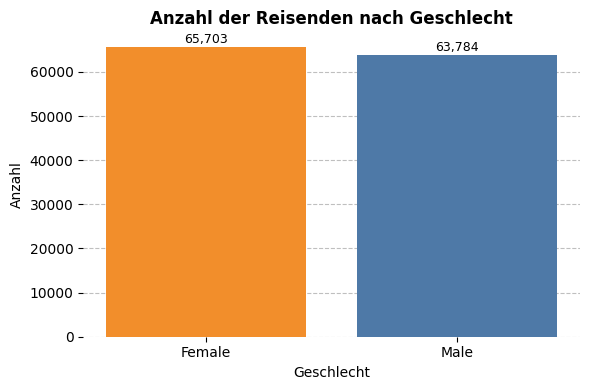

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht erfolgt)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Anzahl pro Geschlecht zählen
counts = df_zufriedenheit['Gender'].value_counts().sort_index()
labels = counts.index
values = counts.values


colors = ['#F28E2B', '#4E79A7']  # z. B. Female, Male

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Geschlecht', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Geschlecht')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{val:,}',
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.box(False)
plt.show()

**Frage: Wie verteilen sich die Passagiere auf die Buchungsklassen?**

Zur Einordnung des Serviceerlebnisses wurde analysiert, wie sich die Passagiere auf die unterschiedlichen Buchungsklassen verteilen. Der Großteil der Passagiere buchte dabei ein Business- oder Economy-Ticket. Die Economy Plus ist deutlich geringer vertreten.

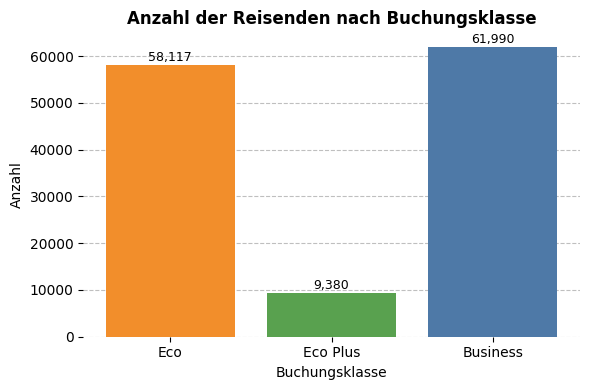

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht gemacht)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)


class_order = ['Eco', 'Eco Plus', 'Business']
counts = df_zufriedenheit['Class'].value_counts()
counts = counts.reindex(class_order)  # Reihenfolge festlegen

labels = counts.index
values = counts.values

colors = ['#F28E2B', '#59A14F', '#4E79A7']
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Buchungsklasse', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Buchungsklasse')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{int(val):,}',
            ha='center', va='bottom', fontsize=9)

# IBCS: klares Layout
plt.tight_layout()
plt.box(False)
plt.show()


**Frage: Wie verteilen sich die Reisenden nach Segment?**

Um ein besseres Verständnis über die Zusammensetzung der Passagiere zu erhalten, wurde die Verteilung der Reisetypen im Datensatz ausgewertet. Dabei zeigt sich, dass 89445 Reisende Geschäftlich unterwegs sind und 40042 privat fliegen, basierend auf den insgesamt 129487 gesammelten Passagierangaben.

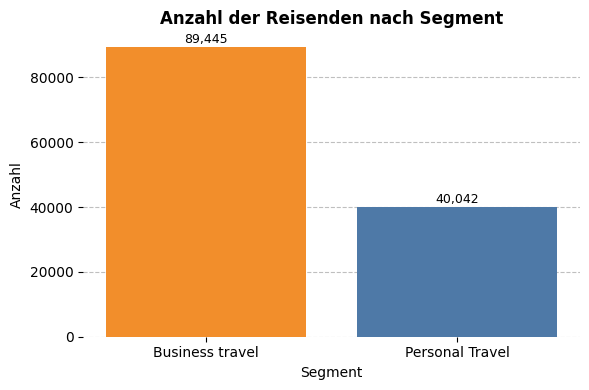

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Absolute Anzahl der Reisetypen zählen
counts = df_zufriedenheit['Type of Travel'].value_counts().sort_index()
labels = counts.index
values = counts.values

colors = ['#F28E2B', '#4E79A7']  # z. B. Business, Personal
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Segment', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Segment')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{val:,}',  # Mit Tausendertrennzeichen
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.box(False)
plt.show()

**Frage: Wie ist die allgemeine Verteilung der Zufriedenheit?**

Um ein erstes verständis über die allgemeine Zufriedenheit der Passagiere zu erlangen wurde die Verteilung der Bewertungen ausgewertet. Die Analyse hat dabei ergeben, dass rund 45% der befragten Passagiere unzufrieden mit ihren Erfahrungen während des Fluges waren, während etwa 55% der Passagiere zufrieden waren. Das sind bei den rund 129.100 Passagierbewertungen die für diese Analyse berücksichtigt wurden, rund 58.500 Passagiere die nicht zufrieden waren. Die Verteilung ist damit nicht vollständig ausgewogen, hat aber dennoch kein zu starkes Ungleichgewicht. Der vergleichsweise hohe Anteil unzufriedener Passagiere kann auf konkrete Schwachstellen im Service hinweisen und wird in den folgenden Analysen weiter untersucht.

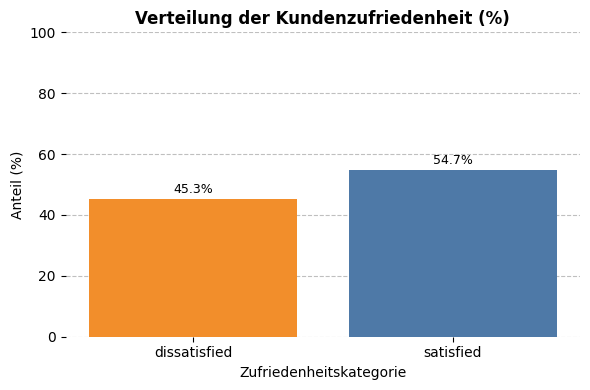

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Prozentuale Verteilung berechnen
counts = df_zufriedenheit['satisfaction'].value_counts(normalize=True).sort_index() * 100
labels = counts.index
values = counts.values

# IBCS-konformer Plot (in Prozent)
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=['#F28E2B', '#4E79A7'])

# Achsen & Beschriftung
ax.set_title('Verteilung der Kundenzufriedenheit (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Zufriedenheitskategorie')
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Prozentwerte auf Balken
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

# IBCS: Randlos und klar
plt.tight_layout()
plt.box(False)
plt.show()



**Frage: Gibt es signifikante Unterschiede in der Kundenzufriedenheit zwischen Economy-, Eco Plus und Business-Class-Passagieren?**

Das Ziel dieser Frage ist zu erkennen, ob bestimmte Buchungsklassen überproportional unzufriedene Kunden haben.

Aus dem unten aufgeführten Balkendiagramm lassen sich deutliche Unterschiede zwischen den Klassen erkennen. Die Passagiere in der Business Class sind mit 71% deutlich zufriedener als die der Eco- und Eco Plus Class. Das ist ein sehr großer Unterschied, die Business Class hat damit fast doppelt so viele zufriedene Kunden wie die Economy Class.

Die Economy und die Eco Plus Class zeigen eine deutlich niedrigere Zufriedenheit. Hier liegt die Zufriedenheit mit nur 39% und 43% weit unter der Business Class.

Diese Werte deuten darauf hin, dass es in der Economy- und Eco-Plus Class einen überdurchschnittlichen Anteil unzufriedener Kunden gibt.


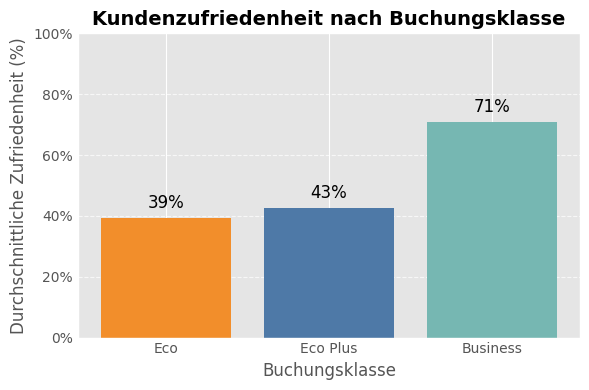

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)

# Zufriedenheit in numerische Werte umwandeln
df_zufriedenheit["satisfaction"] = df_zufriedenheit["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Durchschnittliche Zufriedenheit pro Klasse
class_satisfaction = df_zufriedenheit.groupby("Class")["satisfaction"].mean().sort_values()

# IBCS-konforme Visualisierung
plt.figure(figsize=(6, 4))
colors = ["#F28E2B", "#4E79A7", "#76B7B2"]  # Orange, Blau, Grün
bars = plt.bar(class_satisfaction.index, class_satisfaction.values, color=colors)

# Prozentangaben auf den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.0%}",
             ha='center', va='bottom', fontsize=12, color="black")

# Achsenbeschriftungen & Titel (IBCS-orientiert)
plt.ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
plt.xlabel("Buchungsklasse", fontsize=12)
plt.title("Kundenzufriedenheit nach Buchungsklasse", fontsize=14, weight='bold')

# Y-Achse als Prozent anzeigen
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, 1)

# Dezente Hilfslinien
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Frage: Wie unterscheidet sich die Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden?**

Das Ziel dieser Frage ist es, die Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden zu vergleichen, um in späteren Analysen mögliche Unterschiede in den Erfahrungen während der Reise und den Servicebewertungen der beiden Gruppen zu identifizieren.

Das untenstehende Balkendiagramm zeigt einen auffälligen Unterschied in der Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden. Geschäftsreisende erreichen eine Zufriedenheitsrate von 58%, was im Vergleich zu den 46% Zufriedenheit der Urlaubsreisenden deutlich höher ist. Dieser Unterschied von 12 Prozentpunkten ist bemerkenswert und gibt wichtige Hinweise auf die unterschiedlichen Erwartungen und Prioritäten der beiden Gruppen.

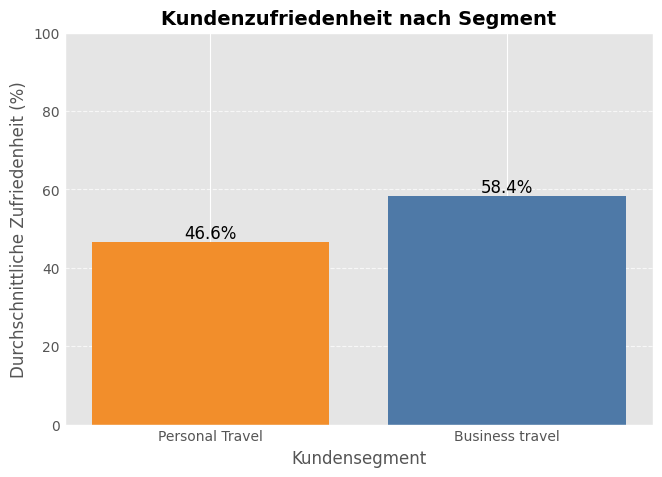

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)

# Umwandlung der Zufriedenheits-Spalte
df_zufriedenheit["satisfaction"] = df_zufriedenheit["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Durchschnittliche Zufriedenheit pro Kundensegment berechnen
segment_satisfaction = df_zufriedenheit.groupby("Type of Travel")["satisfaction"].mean().sort_values() * 100  # in %

# IBCS-gerechte Visualisierung
plt.figure(figsize=(6, 4))
bars = plt.bar(segment_satisfaction.index, segment_satisfaction.values,
               color=["#F28E2B", "#4E79A7"])  # Orange für niedrigere, Blau für höhere Zufriedenheit

# Werte direkt auf den Balken anzeigen
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%",
             ha='center', va='bottom', fontsize=12, color="black")

# Titel & Achsenbeschriftungen (IBCS-konform)
plt.ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
plt.xlabel("Kundensegment", fontsize=12)
plt.title("Kundenzufriedenheit nach Segment", fontsize=14, weight='bold')
plt.ylim(0, 100)  # Skala von 0% bis 100%
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


**Frage: Gibt es einen Zusammenhang zwischen Alter und Zufriedenheit?**

Das Ziel dieser Frage war es, zu untersuchen, ob es einen Zusammenhang zwischen dem Alter der Fluggäste und ihrer Zufriedenheit gibt. Speziell wurde untersucht, ob ältere Fluggäste eine andere Zufriedenheit aufweisen als jüngere Passagiere.

Die Analyse zeigt, dass die Zufriedenheit je nach Altersgruppe unterschiedlich ist. Bei den jüngeren Passagieren (≤30 Jahre) liegt der Anteil der Unzufriedenen mit 55.6% deutlich über dem Anteil der Zufriedenen, der bei 44.4% liegt. Für die mittelalten Passagiere (31–60 Jahre) zeigt sich ein gegensätzliches Bild. Hier sind 61.5% der Passagiere zufrieden, während nur 38.5% unzufrieden sind. Bei den älteren Passagieren (>60 Jahre) ähnelt die Verteilung der Zufriedenheit der bei den jüngeren Passagieren. Denn hier ist die Zufriedenheit mit nur 43.8% ähnlich der der jüngeren Gruppe, da 56.2% der älteren Fluggäste unzufrieden sind.

Es lässt sich eine Tendenz erkennen, dass mittelalte Fluggäste (31–60 Jahre) am zufriedensten sind, während sowohl die jüngeren als auch älteren Passagiere ähnlich hohe Unzufriedenheitswerte haben.

<ipython-input-6-3ed10e52f812>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_zufriedenheit.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0)


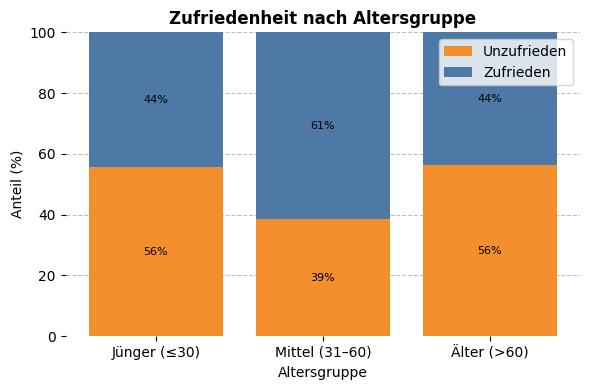

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Altersgruppen definieren (du kannst hier andere Grenzen setzen)
bins = [0, 30, 60, 100]
labels = ['Jünger (≤30)', 'Mittel (31–60)', 'Älter (>60)']
df_zufriedenheit['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Gruppieren: Anteil der Zufriedenen pro Altersgruppe
grouped = df_zufriedenheit.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0)

# Umrechnung in Prozent
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# IBCS-konformer Graustufen-Plot (nur "zufrieden" vs. "nicht zufrieden")
fig, ax = plt.subplots(figsize=(6, 4))

bars1 = ax.bar(grouped_percent.index, grouped_percent['dissatisfied'], label='Unzufrieden', color='#F28E2B')
bars2 = ax.bar(grouped_percent.index, grouped_percent['satisfied'], bottom=grouped_percent['dissatisfied'], label='Zufrieden', color='#4E79A7')

# Beschriftungen
ax.set_title('Zufriedenheit nach Altersgruppe', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Altersgruppe')
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.legend(loc='upper right')

# Werte auf Balken (optional)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2 if bar.get_y() == 0 else bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.box(False)
plt.show()


**Frage: Wie unterscheidet sich die Zufriedenheit je nach Flugdistanz?**

Das Ziel dieser Frage ist es herauszufinden, ob die Flugdauer bzw. -distanz einen Einfluss auf die Zufriedenheit der Passagiere hat. Konkret soll dabei herausgefunden werden, ob Passagiere bei Kurz-, Mittel- oder Langstreckenflügen unterschiedlich zufrieden sind.

Die Auswertung zeigt ein klares Bild. Bei Kurzstreckenflüge (≤800 km) liegt die Zufriedenheit der Passagiere mit 75% am höchsten. Bei Mittelstreckenflüge (801–1600 km) waren nur nur noch 52% der Passagiere zufrieden. Bei den Langstreckenflügen (>1600 km) liegt die Zufriedenheit mit 51% auf einem ähnlichen Niveau wie bei den Mittelstreckeflügen.

Das bedeutet: Mit zunehmender Flugdiestanz und damit Fluglänge sinkt die Zufriedenheit der Passagiere. Eine mögliche Erklärung dafür ist, dass Passagiere auf längeren Flügen höhere Erwartungen an Komfort, Service und Unterhaltung haben. Wenn diese Erwartungen nicht erfüllt werden, schlägt sich das eher in negativer Bewertung nieder. Ob dies aber wirklich der Fall ist wird in einer späteren Analyse überprüft.

Insgesamt lässt sich also sagen, dass die befragten Passagiere kürzere Flüge tendenziell als angenehmer empfunden haben, während längere Reisen ein höheres Risiko für Unzufriedenheit mit sich bringen.

<ipython-input-18-e6ec27a3f79c>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['flight_group', 'satisfaction']).size().unstack(fill_value=0)


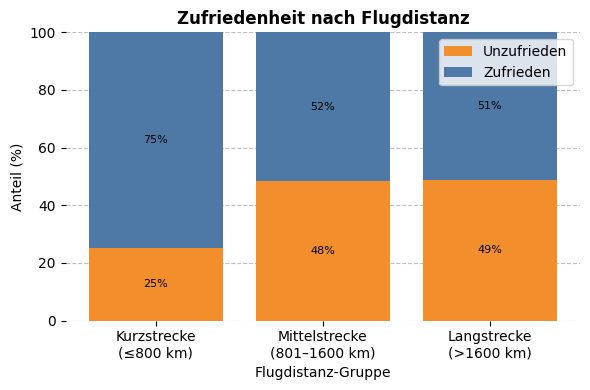

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)


# Gruppen nach Flugdistanz (anpassbare Schwellenwerte)
bins = [0, 800, 1600, df['Flight Distance'].max()]
labels = ['Kurzstrecke\n(≤800 km)', 'Mittelstrecke\n(801–1600 km)', 'Langstrecke\n(>1600 km)']
df_zufriedenheit['flight_group'] = pd.cut(df_zufriedenheit['Flight Distance'], bins=bins, labels=labels, right=True)

# Gruppieren: Anteil Zufriedene vs. Unzufriedene je Fluggruppe
grouped = df_zufriedenheit.groupby(['flight_group', 'satisfaction']).size().unstack(fill_value=0)

# In Prozent umwandeln
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# IBCS-konformer Plot in Graustufen
fig, ax = plt.subplots(figsize=(6, 4))


bars1 = ax.bar(grouped_percent.index, grouped_percent['dissatisfied'], label='Unzufrieden', color='#F28E2B')
bars2 = ax.bar(grouped_percent.index, grouped_percent['satisfied'], bottom=grouped_percent['dissatisfied'], label='Zufrieden', color='#4E79A7')

# Achsen & Beschriftung
ax.set_title('Zufriedenheit nach Flugdistanz', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Flugdistanz-Gruppe')
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.legend(loc='upper right')

# Prozentwerte auf Balken (optional, IBCS-tauglich)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2 if bar.get_y() == 0 else bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.box(False)
plt.show()


**Frage: Wie beeinflusst die Verspätung die Zufriedenheit**

Ziel dieser Frage ist es herauszufinden, inwieweit Verspätungen beim Abflug die Zufriedenheit der Passagiere beeinflussen. Da Verspätungen sind ein häufiger Stressfaktor beim Fliegen sind und die Wahrnehmung des gesamten Reiseerlebnisses negativ beeinflussen können.

Um zu untersuchen, wie sich Abflugverspätungen auf die Zufriedenheit der Passagiere auswirken, wurde die Verspätung anhand ihrer Dauer in vier Kategorien unterteilt: pünktlich, geringe Verspätung (1–15 Minuten), mittlere Verspätung (16–60 Minuten) und hohe Verspätung (über 60 Minuten).

Die Ergebnisse zeigen einen klaren Zusammenhang zwischen der Verspätung des Fluges und der Zufriedenheit der Passagiere. Bei pünktlichen Flügen liegt die Zufriedenheit bei 57%. Bereits bei geringen Verspätungen, von bis zu 15 Minuten, sinkt sie leicht auf 55%. Bei mittleren Verspätungen wird der Rückgang der Zufriedenheit noch deutlicher, und sie sinkt auf nur noch 50%. Bei hohen Verspätungen ist dieser Rückgang noch deutlicher, die Zufriedenheit liegt hier nur noch bei 44%.

Damit zeigen die Ergebnisse deutlich, dass die Zufriedenheit der Passagiere mit zunehmender Verspätung kontinuierlich abnimmt. Während kurze Verzögerungen noch relativ kleine Auswirkungen auf die Zufriedenheit haben, führen längere Wartezeiten zunehmend zu Unmut. Vor allem bei über einstündigen Verspätungen scheint die Geduld vieler Passagiere erschöpft zu sein. Die Analyse bestätigt damit, dass die Pünktlichkeit eines Fluges ein zentraler Faktor für die Zufriedenheit des Passagiers ist.

<ipython-input-26-8868dbb40216>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['delay_category', 'satisfaction']).size().unstack(fill_value=0)


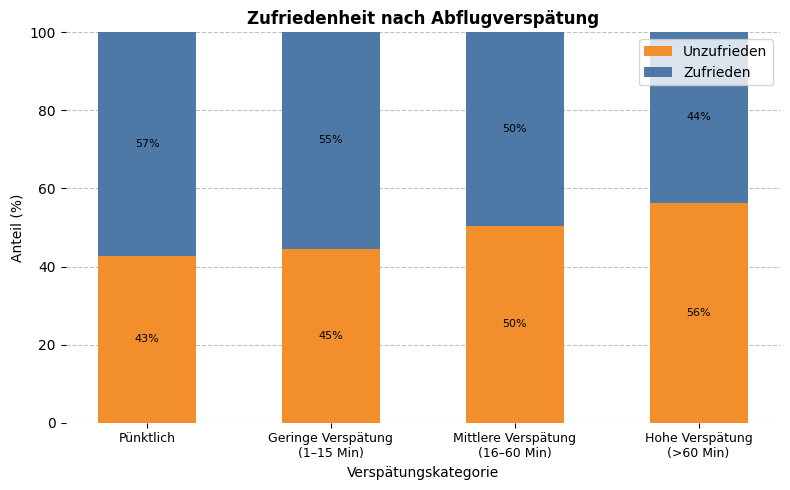

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Verspätungskategorien definieren
bins = [-1, 0, 15, 60, df['Departure Delay in Minutes'].max()]
labels = ['Pünktlich',
          'Geringe Verspätung\n(1–15 Min)',
          'Mittlere Verspätung\n(16–60 Min)',
          'Hohe Verspätung\n(>60 Min)']
df_zufriedenheit['delay_category'] = pd.cut(df_zufriedenheit['Departure Delay in Minutes'], bins=bins, labels=labels)

# Gruppieren nach Verspätungskategorie und Zufriedenheit
grouped = df_zufriedenheit.groupby(['delay_category', 'satisfaction']).size().unstack(fill_value=0)

# In Prozent umrechnen
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reihenfolge der Kategorien sicherstellen
order = labels
grouped_percent = grouped_percent.loc[order]

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(grouped_percent.index)) * 1.5

bars1 = ax.bar(x, grouped_percent['dissatisfied'], label='Unzufrieden', color='#F28E2B')
bars2 = ax.bar(x, grouped_percent['satisfied'], bottom=grouped_percent['dissatisfied'], label='Zufrieden', color='#4E79A7')

# Achsen & Beschriftung
ax.set_title('Zufriedenheit nach Abflugverspätung', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Verspätungskategorie')
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(order, fontsize=9)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.legend(loc='upper right')

# Prozentwerte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.box(False)
plt.show()



Frage: Einfluss der Verspätung auf die Zufrieden bzw. Unzufriedenheit (selbe Frage wie oben, andere Darstellung)

<ipython-input-30-f0172f0e6e3c>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['delay_category']).agg(


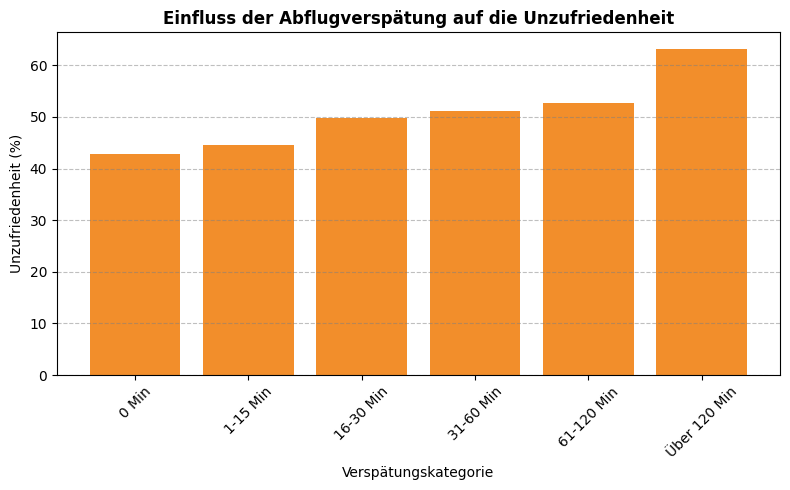

In [ ]:
# verspätung frustrationsgrenze
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit als binär kodieren (Zufrieden: 1, Unzufrieden: 0)
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Verspätung in Intervalle unterteilen
bins = [-1, 0, 15, 30, 60, 120, df['Departure Delay in Minutes'].max()]
labels = ['0 Min', '1-15 Min', '16-30 Min', '31-60 Min', '61-120 Min', 'Über 120 Min']
df['delay_category'] = pd.cut(df['Departure Delay in Minutes'], bins=bins, labels=labels)

# Gruppieren nach Verspätungskategorie und Unzufriedenheit
grouped = df.groupby(['delay_category']).agg(
    dissatisfied=('satisfaction_binary', lambda x: (x == 0).sum()),
    total=('satisfaction_binary', 'size')
)

#  Anteil der Unzufriedenen in jedem Verspätungsintervall berechnen
grouped['unhappy_percentage'] = (grouped['dissatisfied'] / grouped['total']) * 100

# Balkendiagramm erstellen
plt.figure(figsize=(8, 5))
plt.bar(grouped.index, grouped['unhappy_percentage'], color='#F28E2B')

# Achsen & Titel
plt.title('Einfluss der Abflugverspätung auf die Unzufriedenheit', fontsize=12, fontweight='bold')
plt.xlabel('Verspätungskategorie')
plt.ylabel('Unzufriedenheit (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


Frage: Wie unterscheiden sich Zufriedenheitswerte bei verspäteter Ankunft im Vergleich zur geplanten Ankunft?

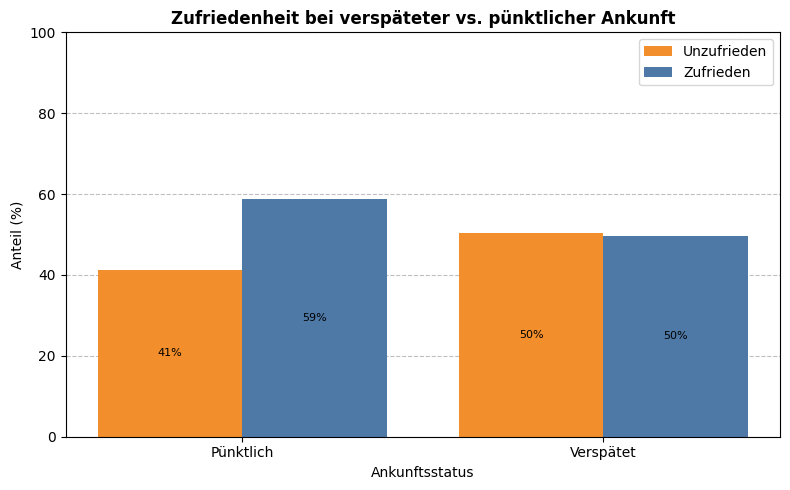

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit als binär kodieren (Zufrieden: 1, Unzufrieden: 0)
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Verspätete Ankünfte und pünktliche Ankünfte trennen
df['arrival_status'] = df['Arrival Delay in Minutes'].apply(lambda x: 'Pünktlich' if x == 0 else 'Verspätet')

# Gruppieren nach Ankunftsstatus und Zufriedenheit
grouped = df.groupby(['arrival_status', 'satisfaction_binary']).size().unstack(fill_value=0)

# In Prozent umrechnen
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(grouped_percent.index))

bars1 = ax.bar(x - 0.2, grouped_percent[0], width=0.4, label='Unzufrieden', color='#F28E2B')
bars2 = ax.bar(x + 0.2, grouped_percent[1], width=0.4, label='Zufrieden', color='#4E79A7')

# Achsen & Beschriftung
ax.set_title('Zufriedenheit bei verspäteter vs. pünktlicher Ankunft', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Ankunftsstatus')
ax.set_xticks(x)
ax.set_xticklabels(grouped_percent.index)
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.legend(loc='upper right')

# Prozentwerte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


Frage: Zufriedenheit bei schlechter bzw. guter Servicebewertung

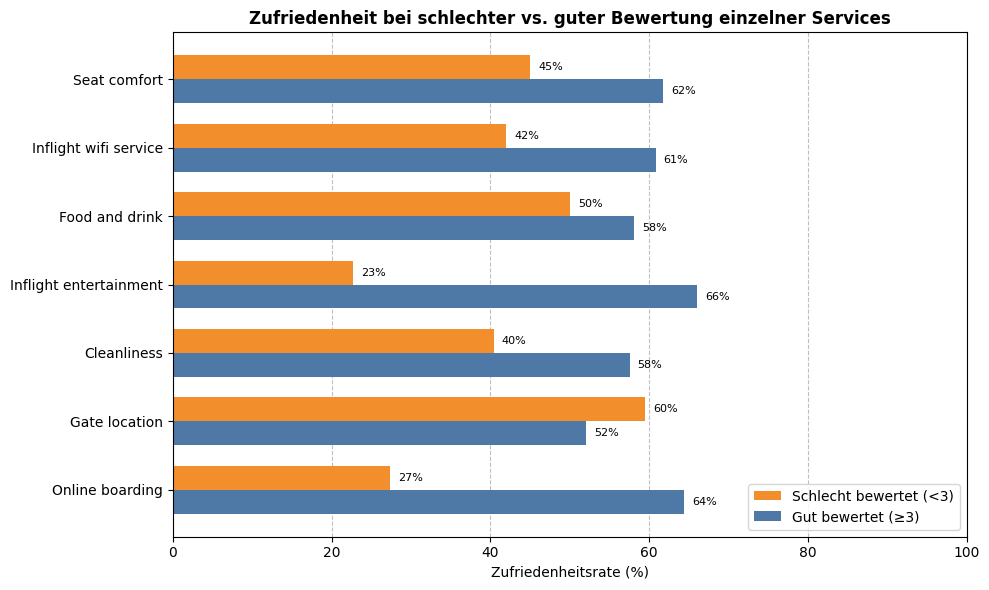

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Relevante Service-Spalten
features = [
    'Seat comfort',
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Cleanliness',
    'Gate location',
    'Online boarding'
]

results = []

# Für jedes Feature: zwei Gruppen vergleichen (Bewertung <3 vs. ≥3)
for feature in features:
    df[f'{feature}_group'] = df[feature].apply(lambda x: 'Schlecht (<3)' if x < 3 else 'Gut (≥3)')
    grouped = df.groupby(f'{feature}_group')['satisfaction_binary'].mean() * 100
    results.append({
        'Feature': feature,
        'Schlecht (<3)': grouped.get('Schlecht (<3)', 0),
        'Gut (≥3)': grouped.get('Gut (≥3)', 0)
    })

# In DataFrame umwandeln
plot_df = pd.DataFrame(results).set_index('Feature')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(plot_df))

bars1 = ax.barh([i - bar_width/2 for i in x], plot_df['Schlecht (<3)'], height=bar_width, label='Schlecht bewertet (<3)', color='#F28E2B')
bars2 = ax.barh([i + bar_width/2 for i in x], plot_df['Gut (≥3)'], height=bar_width, label='Gut bewertet (≥3)', color='#4E79A7')

# Achsen & Layout
ax.set_yticks(x)
ax.set_yticklabels(plot_df.index)
ax.set_xlabel('Zufriedenheitsrate (%)')
ax.set_title('Zufriedenheit bei schlechter vs. guter Bewertung einzelner Services', fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.invert_yaxis()  # Bessere Lesbarkeit (oben = wichtigster Service)
ax.grid(axis='x', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)
plt.legend(loc='lower right')

# Werte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()


Frage: Zufriedenheit bei guter bzw. schlechter Serviceleistung, aufgeteilt auf Reiseklasse

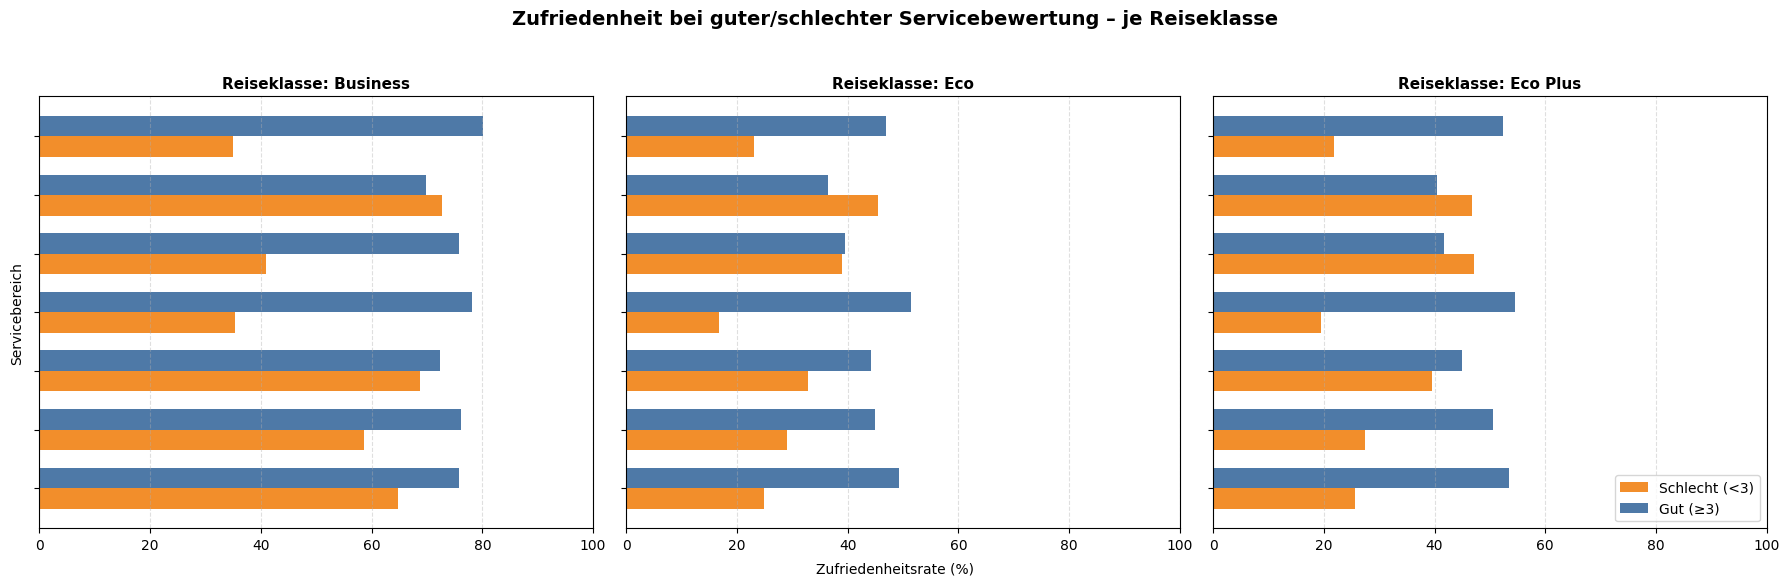

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Nur relevante Klassen
df = df[df['Class'].isin(['Business', 'Eco', 'Eco Plus'])]

# Service-Features
features = [
    'Seat comfort',
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Cleanliness',
    'Gate location',
    'Online boarding'
]

# Daten vorbereiten
results = []
for feature in features:
    df[f'{feature}_group'] = df[feature].apply(lambda x: 'Schlecht (<3)' if x < 3 else 'Gut (≥3)')
    for cls in ['Business', 'Eco', 'Eco Plus']:
        for grp in ['Schlecht (<3)', 'Gut (≥3)']:
            subset = df[(df['Class'] == cls) & (df[f'{feature}_group'] == grp)]
            if len(subset) > 0:
                satisfaction_rate = subset['satisfaction_binary'].mean() * 100
                results.append({
                    'Feature': feature,
                    'Bewertung': grp,
                    'Klasse': cls,
                    'Zufriedenheitsrate': satisfaction_rate
                })

plot_df = pd.DataFrame(results)

# Farben definieren
farben = {
    'Schlecht (<3)': '#F28E2B',
    'Gut (≥3)': '#4E79A7'
}

# Matplotlib: Subplots pro Klasse
klassen = ['Business', 'Eco', 'Eco Plus']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, klasse in zip(axes, klassen):
    subset = plot_df[plot_df['Klasse'] == klasse]

    # Y-Achsenpositionen
    y_positions = np.arange(len(features))
    bar_width = 0.35

    # Werte extrahieren
    schlecht = subset[subset['Bewertung'] == 'Schlecht (<3)']['Zufriedenheitsrate'].values
    gut = subset[subset['Bewertung'] == 'Gut (≥3)']['Zufriedenheitsrate'].values

    # Balken
    ax.barh(y_positions - bar_width/2, schlecht, height=bar_width, color=farben['Schlecht (<3)'], label='Schlecht (<3)')
    ax.barh(y_positions + bar_width/2, gut, height=bar_width, color=farben['Gut (≥3)'], label='Gut (≥3)')

    ax.set_yticks(y_positions)
    ax.set_yticklabels(features)
    ax.set_title(f'Reiseklasse: {klasse}', fontsize=11, fontweight='bold')
    ax.set_xlim(0, 100)
    ax.grid(axis='x', linestyle='--', alpha=0.4)
    if ax == axes[0]:
        ax.set_ylabel("Servicebereich")
    else:
        ax.set_yticklabels([])  # Nur beim ersten Plot Y-Labels

    if ax == axes[2]:
        ax.legend(loc='lower right')

# Gemeinsame X-Achse
fig.text(0.5, 0.04, 'Zufriedenheitsrate (%)', ha='center')
fig.suptitle('Zufriedenheit bei guter/schlechter Servicebewertung – je Reiseklasse', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


Frage: Welche Bordservices (z. B. WLAN, Entertainment, Essen & Trinken) haben den größten Einfluss auf die Zufriedenheit?

Ziel:Identifikation von Servicebereichen, die verbessert werden sollten, um eine höhere Zufriedenheit zu erreichen.

Inflight Entertainment zeigt den größten Unterschied in der Bewertung zwischen zufriedenen und unzufriedenen Kunden mit einem Delta von +1.41 und damit auch den grössten Einflussfaktor der Bordservices auf die Zufriedenheit.

Der Seat Comfort ist ebenfalls ein bedeutender Zufriedenheitsfaktor mit einem Delta von +0.68, Komfort spielt eine zentrale Rolle.

Inflight Wifi Service hat einen mittleren Einfluss mit einem Delta von +0.60, eine stabile Internetverbindung wird also geschätzt.

Food and Drink weist nur einen geringen Unterschied von Delta +0.35 auf, weniger entscheidend für die Gesamtzufriedenheit.

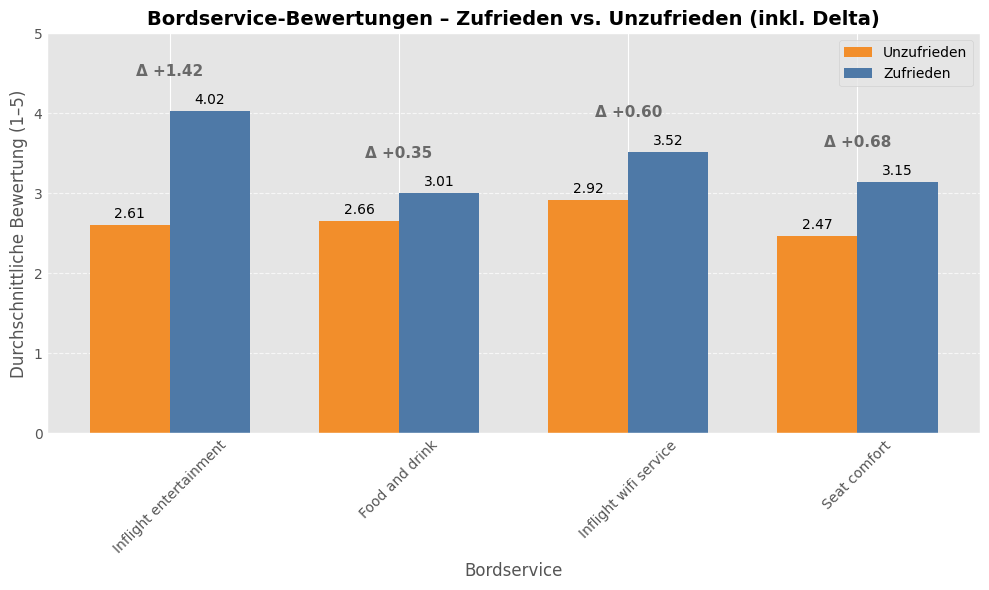

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Bordservices
bord_services = ['Inflight entertainment', 'Food and drink', 'Inflight wifi service', 'Seat comfort']

# Durchschnittswerte je Gruppe berechnen
grouped = df.groupby("satisfaction")[bord_services].mean()
delta = grouped.loc[1] - grouped.loc[0]

# Plot-Daten vorbereiten
labels = bord_services
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Balken zeichnen
bars1 = ax.bar(x - width/2, grouped.loc[0], width, label='Unzufrieden', color="#F28E2B")
bars2 = ax.bar(x + width/2, grouped.loc[1], width, label='Zufrieden', color="#4E79A7")

# Balkenbeschriftungen für beide Gruppen
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
            f"{height:.2f}", ha='center', va='bottom', fontsize=10, color="black")

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
            f"{height:.2f}", ha='center', va='bottom', fontsize=10, color="black")

# Delta-Werte oberhalb der Balkenpaare
for i, label in enumerate(labels):
    diff = delta[label]
    max_height = max(grouped.loc[0, label], grouped.loc[1, label])
    ax.text(x[i], max_height + 0.4, f"Δ {diff:+.2f}",
            ha='center', va='bottom', fontsize=11, fontweight='bold', color="dimgray")

# Achsen & Stil
ax.set_ylabel('Durchschnittliche Bewertung (1–5)', fontsize=12)
ax.set_xlabel('Bordservice', fontsize=12)
ax.set_title('Bordservice-Bewertungen – Zufrieden vs. Unzufrieden (inkl. Delta)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.set_ylim(0, 5)
ax.grid(axis='y', linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Fragestellung: Wieviele Passagiere sind jährlich in mit American Airlines gereist und in welchen Jahren ist man am meisten mit American Airlines geflogen?

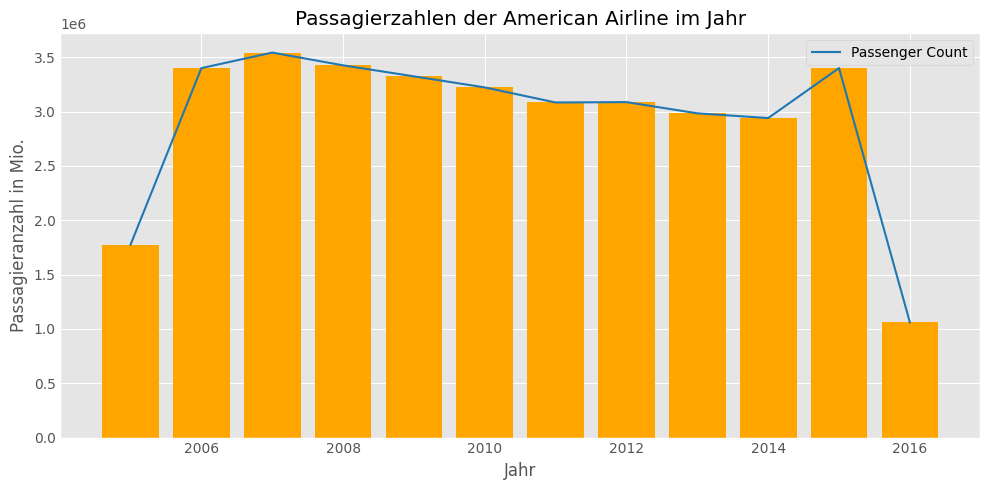

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Bereinigung der nichtverwendeten numerischen Spalten
df_AA_plt = df_AA
df_AA_plt = df_AA_plt.drop("Adjusted Passenger Count", axis=1)
df_AA_plt = df_AA_plt.drop("Activity Period", axis=1)
df_AA_plt = df_AA_plt.drop("index", axis=1)
#df_AA['Durchschnitt'] = df_AA[['']]
# Gruppieren nach Jahren
df_AA_group = df_AA_plt.groupby(['Year']).sum()

# Diagrammdarstellung
df_AA_group_pc = df_AA_group['Passenger Count']
df_AA_group.plot(figsize=(10, 5))
plt.bar(df_AA_group.index, df_AA_group_pc, color='orange')
plt.grid(True)
plt.style.use('_mpl-gallery')
plt.title('Passagierzahlen der American Airline im Jahr')
plt.xlabel('Jahr')
plt.ylabel('Passagieranzahl in Mio.')
plt.tight_layout()

# Zahlenwerte den Säulen hinzufügen
#for i, value in enumerate(df_AA_group_pc):
#    plt.text(i, value, str(value), ha='center')

plt.show()

Im Jahr 2016 und 2005 ist man gemäss Datenset am wenigsten mit American Airlines geflogen. Am meisten ist man im Jahr 2007 mit der Fluggesellschaft geflogen.

Um eine Aussage darüber zu machen, ob es Monate gibt, die wiederkehrend einen hohen Passagierandrang bedeuten, ist eine Ansicht der Passierentwicklung nach Monaten zu visualisieren.

In [ ]:
# Zeitspalte vorbereiten
df_AA['Activity Period'] = pd.to_datetime(df_AA['Activity Period'], format='%Y%m')
mperiode = df_AA.groupby("Activity Period")["Passenger Count"].sum()

mperiode.head()

<ipython-input-96-01a2da64e639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA['Activity Period'] = pd.to_datetime(df_AA['Activity Period'], format='%Y%m')


,Passenger Count
Activity Period,
2005-07-01,338173
2005-08-01,329863
2005-09-01,279393
2005-10-01,285835
2005-11-01,275873


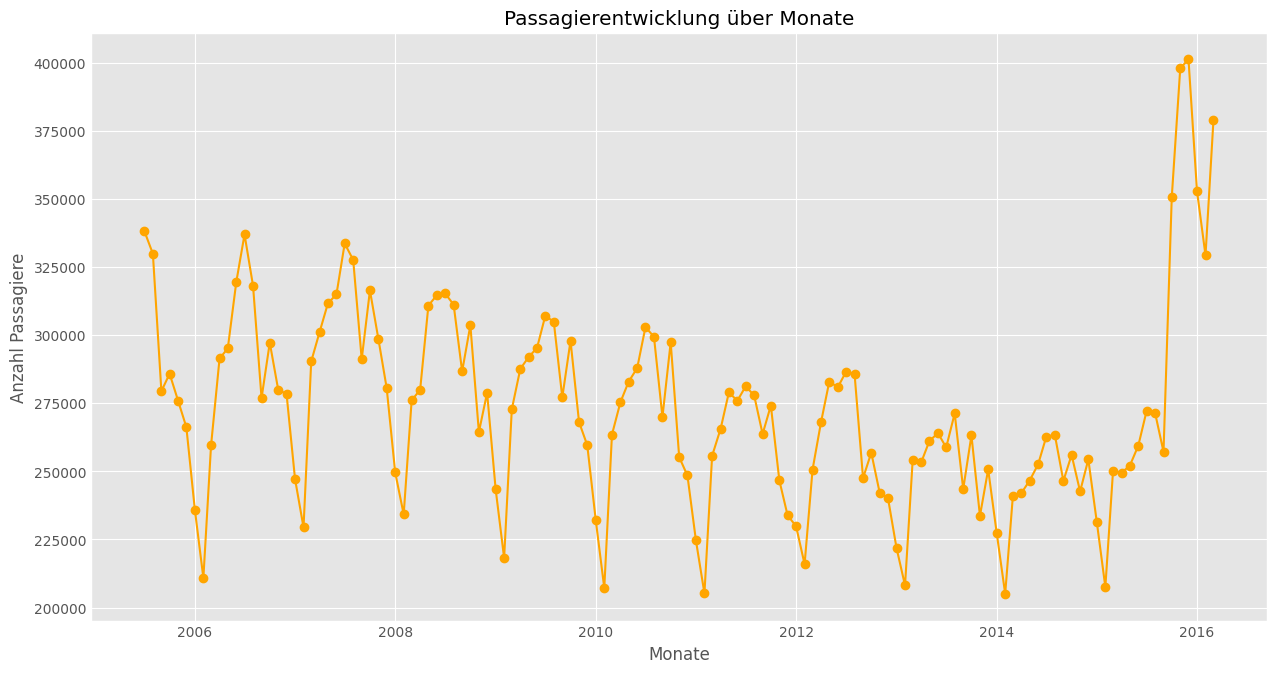

In [ ]:
# Zeitreihe plotten
plt.figure(figsize=(12, 6))
plt.plot(mperiode.index, mperiode.values, marker='o', color='orange')
plt.title("Passagierentwicklung über Monate")
plt.xlabel("Monate")
plt.ylabel("Anzahl Passagiere")
plt.grid(True)
plt.show()

# Literaturverzeichnis
Interanational, B. (2014, Dezember 11). *Airline Customer Experience*. B2B International. https://www.b2binternational.de/airline-customer-experience-ein-lacheln-kostet-nichts/)

Kaggle. (o. J.). Kaggle: Your Machine Learning and Data Science Community. Abgerufen am 31. März 2024, von https://www.kaggle.com/

Marr, B. (2020). From data to decisions: A five-step approach to data-driven decision-making. CPA Management Accounting Guideline.

Rashedi, J. (2024). Customer Analytics. In J. Rashedi, Customer Insights (S. 65–97). Springer Fachmedien Wiesbaden. https://doi.org/10.1007/978-3-658-43392-5_5



 Top 5 Rows
Age
0    65
1    47
2    15
3    60
4    70
Name: Age, dtype: int64

 Jeweiliger Datentyp pro Spalte
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                    

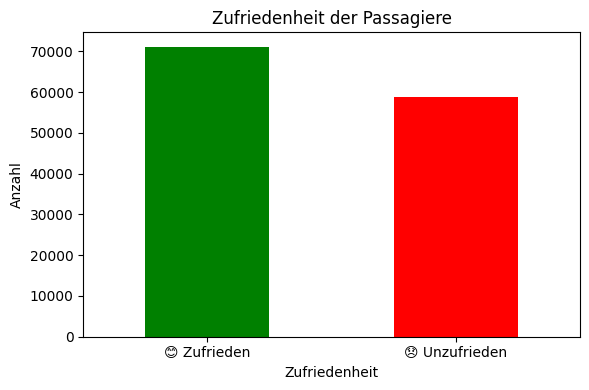

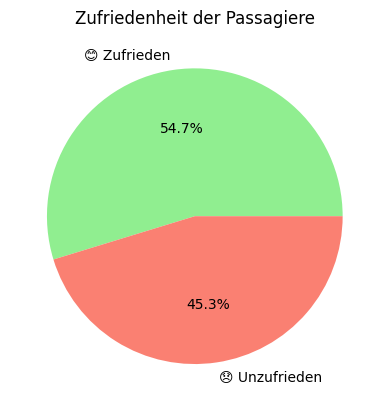

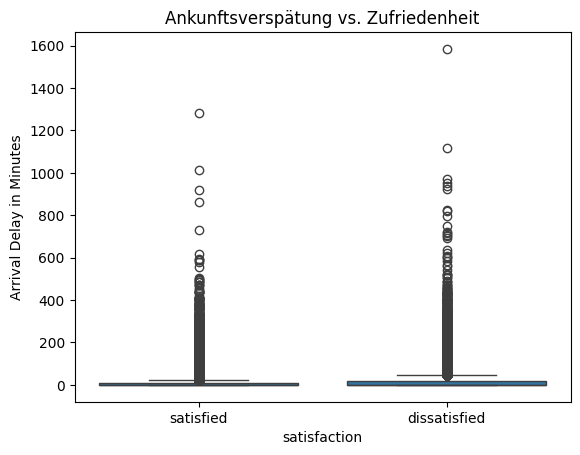

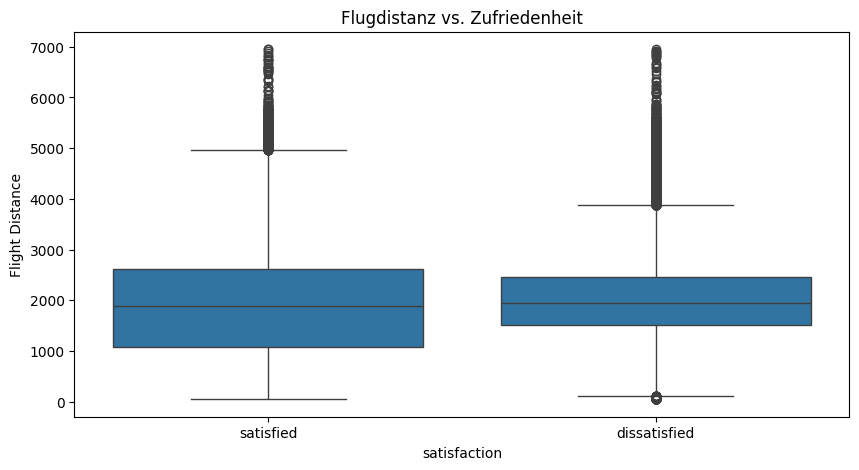

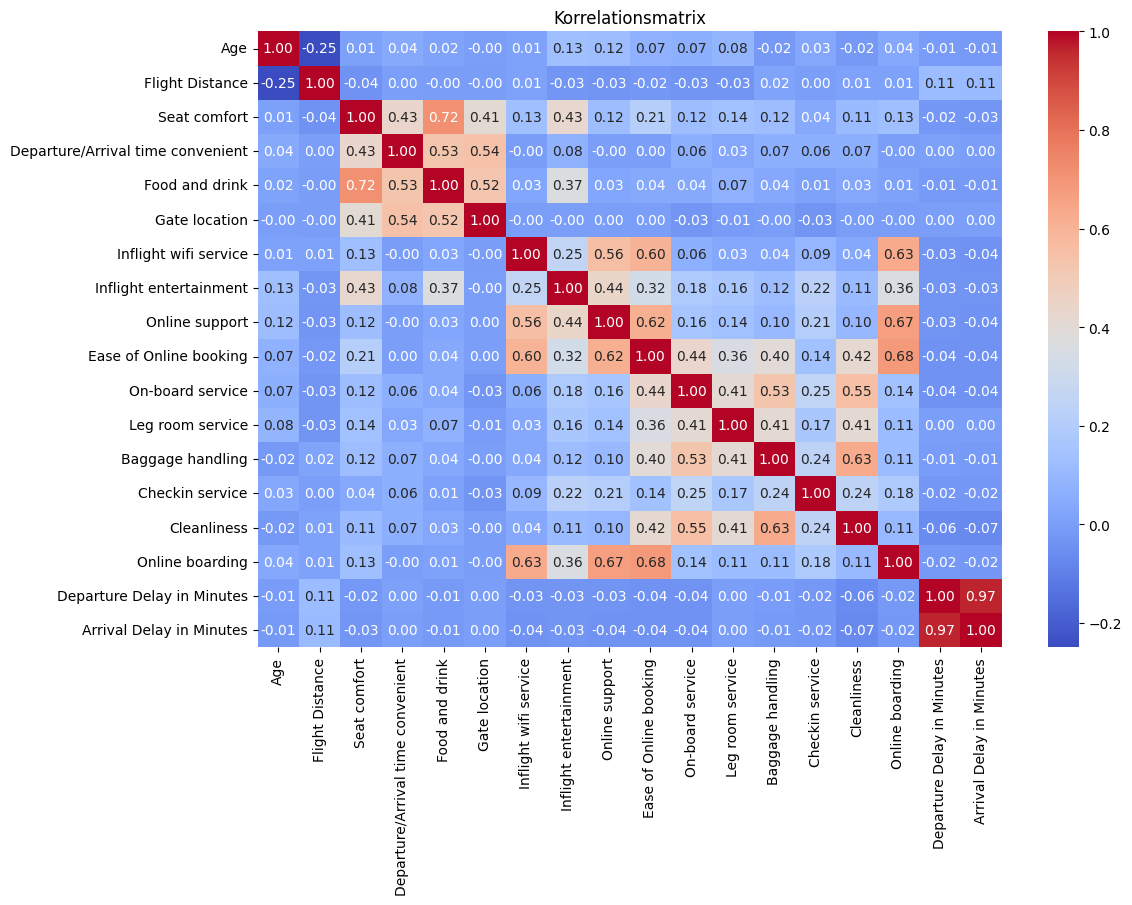

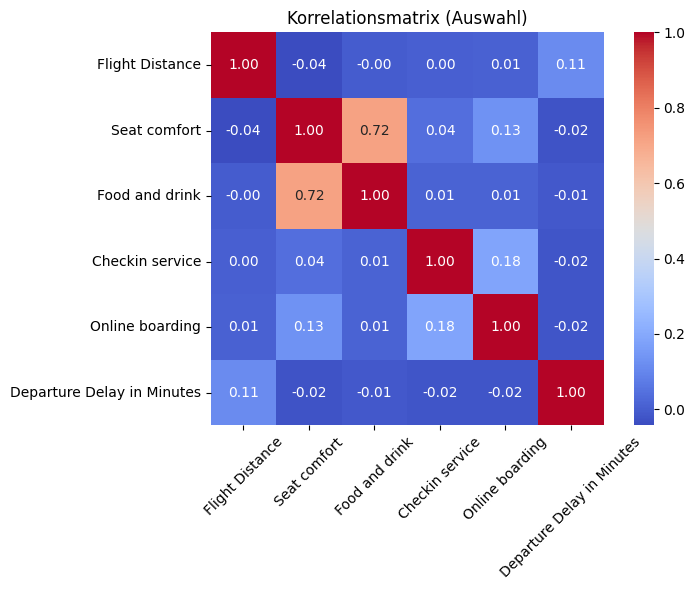

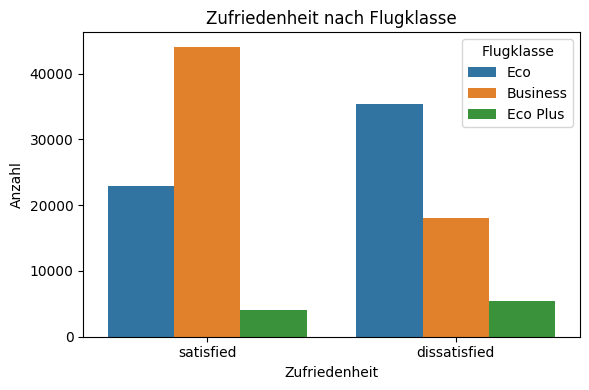

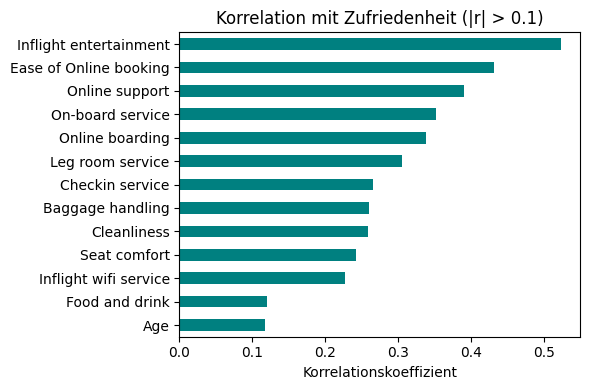

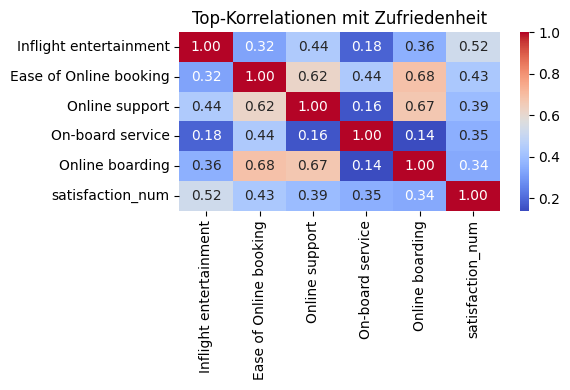

['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_num']

 Accuracy: 1.0

 Confusion Matrix:
[[11821     0]
 [    0 14077]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11821
           1       1.00      1.00      1.00     14077

    accuracy                           1.00     25898
   macro avg       1.00      1.00      1.00     25898
weighted avg       1.00      1.00      1.00     25898

Vorhersage für hypothetischen Passagier: Unzufrieden


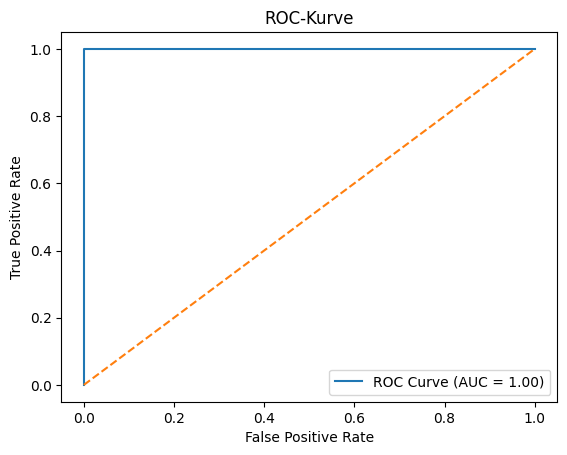

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Einlesen via Pandas(pd) und einem CSV
df = pd.read_csv("Invistico_Airline.csv")
print("\n Top 5 Rows")
#print(df.head())  # Top 5 jeder Spalte des Datensets
print("Age")
print(df['Age'].head()) # Einschränkung für gewünschte Spalte möglich

# In einem ersten Schritt sichten wir unsere Daten, damit wir ein Gesamtbild haben und erste Richtungen für die detaillierte Analyse definieren können.
# Welche Spalte hält welchen Datentyp
print("\n Jeweiliger Datentyp pro Spalte")
print(df.dtypes)
# print(df['Age'].dtypes) # Einschränkung für gewünschte Spalte möglich

# Einzigartige Werte pro Spalte
print("\n Anzahl einzigartiger Werte pro Spalte (Unique)")
print(df.nunique())
# print(df['Age'].nunique()) # Einschränkung für gewünschte Spalte möglich

# Fehlende Werte im Datensatz erkennen
print("\n Spalten:", df.columns.tolist())
print("\n Fehlende Werte pro Spalte:")
print(df.isnull().sum())

# Statistische Übersicht über numerische Spalten
print("\n Statistische Kennzahlen für den jeweiligen Parameter")
print("count: Anzahl der Nicht-NaN-Werte")
print("mean: Mittelwert")
print("std: Standardabweichung")
print("min: Minimum")
print("25%: 1. Quartil")
print("50%: Median")
print("75%: 3. Quartil")
print("max: Maximum")
#Ausführen
print(df.describe())
# print(df['Age'].describe()) # Einschränkung für gewünschte nummerische Spalte möglich

# Verteilung bestimmter wichtiger Spalten ansehen
print("\n Verteilung gewisser definierter Parameter")
print(df['Age'].value_counts().sort_index()) #Age
print(df['Gender'].value_counts().sort_index()) #Gender

# Korrelationen zwischen numerischen Variablen
# Korrelation drückt sich folgendermasse aus:
# Beispiel mit Age
# 0.80 bei Alter und Arbeitsjahre: Starker positiver Zusammenhang – je älter, desto mehr Arbeitsjahre.
# 0.65 bei Alter und Gehalt: Mäßig positiver Zusammenhang – älter = tendenziell höheres Gehalt.
print("\n Korrelationsmatrix (numerisch):")
# print(df.corr(numeric_only=True)) # Korrelation aller Parameter
print(df[["Flight Distance", "Seat comfort", "Food and drink"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter
print(df[["Checkin service", "Online boarding", "Departure Delay in Minutes"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter

# Verhältnis von Zufriedenheit zu anderen Merkmalen (Beispiel)
print("\n Zufriedenheit nach Geschlecht")
print(df.groupby('Gender')['satisfaction'].value_counts(normalize=True))

# Duplikate prüfen von Datensatz
print("\n Anzahl Duplikate")
print(df.duplicated().sum())

# Visualisierung Zufriedenheit

# Zufriedenheitskategorien umbenennen
df['satisfaction_label'] = df['satisfaction'].map({
    'satisfied': '😊 Zufrieden',
    'dissatisfied': '😞 Unzufrieden'
})

# Anzeige Zufriedenheitsverteilung
plt.figure(figsize=(6,4))
df['satisfaction_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Zufriedenheit der Passagiere")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Kreisdiagramm
df['satisfaction_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    ylabel='',
    title="Zufriedenheit der Passagiere"
)
plt.show()

# Zufriedenheit Boxplot
sns.boxplot(data=df, x="satisfaction", y="Arrival Delay in Minutes")
plt.title("Ankunftsverspätung vs. Zufriedenheit")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="satisfaction", y="Flight Distance", data=df)
plt.title("Flugdistanz vs. Zufriedenheit")
plt.show()

# Heatmap der numerischen Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()


# Vergleich einzelner ausgewählter Parameter
selected_cols = ['Flight Distance', 'Seat comfort', 'Food and drink', 'Checkin service', 'Online boarding', 'Departure Delay in Minutes']
corr_matrix = df[selected_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatrix (Auswahl)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='satisfaction', hue='Class')
plt.title("Zufriedenheit nach Flugklasse")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.legend(title='Flugklasse')
plt.tight_layout()
plt.show()

df['satisfaction_num'] = df['satisfaction'].map({
    'satisfied': 1,
    'dissatisfied': 0
})

# Nur numerische Features mit Korrelation zur Zufriedenheit (nur absolute Werte > 0.1 anzeigen)
corr_matrix = df.select_dtypes(include='number').corr()
satisfaction_corr = corr_matrix['satisfaction_num'].drop('satisfaction_num')
satisfaction_corr = satisfaction_corr[abs(satisfaction_corr) > 0.1].sort_values()

plt.figure(figsize=(6, 4))
satisfaction_corr.plot(kind='barh', color='teal')
plt.title("Korrelation mit Zufriedenheit (|r| > 0.1)")
plt.xlabel("Korrelationskoeffizient")
plt.tight_layout()
plt.show()

top_corr_features = satisfaction_corr.abs().sort_values(ascending=False).head(5).index.tolist()
selected_features = top_corr_features + ['satisfaction_num']

plt.figure(figsize=(6, 4))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top-Korrelationen mit Zufriedenheit")
plt.tight_layout()
plt.show()
print(corr_matrix.columns.tolist())

# Machine Learning

# Vorbereitung: Nur numerische + sinnvoll gewandelte Features nutzen
# Beispiel: einfache Vorverarbeitung
from sklearn.preprocessing import LabelEncoder

# Kopie des Datensatzes
X = df.copy()

# Zielvariable encodieren
y = LabelEncoder().fit_transform(X['satisfaction_num'])
X = X.drop(columns=['satisfaction_num'])

# Kategorische Features codieren
X = pd.get_dummies(X, drop_first=True)

# Sofortlösung: Fehlende Werte entfernen
X = X.dropna()
y = y[X.index]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klassifikator trainieren
model = LogisticRegression(max_iter=15000)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

neuer_passagier = pd.DataFrame({
    'Gender': ['Male'],
    'Customer Type': ['Loyal Customer'],
    'Age': [45],
    'Type of Travel': ['Business travel'],
    'Class': ['Business'],
    'Flight Distance': [750],
    'Inflight wifi service': [4],
    'Departure Delay in Minutes': [0],
    'Arrival Delay in Minutes': [5],
    # ... alle anderen Features hier ergänzen ...
})

# Umwandeln wie Trainingsdaten
neuer_passagier_encoded = pd.get_dummies(neuer_passagier)
# Fehlende Spalten auffüllen (die im Modell vorhanden waren)
neuer_passagier_encoded = neuer_passagier_encoded.reindex(columns=X.columns, fill_value=0)

# Vorhersage
vorhersage = model.predict(neuer_passagier_encoded)
print("Vorhersage für hypothetischen Passagier:", "Zufrieden" if vorhersage[0] == 1 else "Unzufrieden")

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Kurve")
plt.legend()
plt.show()
